## Notebook Setup 

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("..") / "datasets"
cpi = pd.read_csv(DATA_DIR / "FPCPITOTLZGUSA.csv")  # filename can stay for now

cpi["date"] = pd.to_datetime(cpi["observation_date"])
cpi["inflation_rate"] = pd.to_numeric(cpi["FPCPITOTLZGUSA"], errors="coerce")

cpi = cpi.sort_values("date")
cpi["year"] = cpi["date"].dt.year


In [73]:
cpi_2015_2025 = cpi[(cpi["year"] >= 2015) & (cpi["year"] <= 2025)].copy()
cpi_2015_2025


,observation_date,FPCPITOTLZGUSA,date,inflation_rate,year
55,2015-01-01,0.118627,2015-01-01,0.118627,2015
56,2016-01-01,1.261583,2016-01-01,1.261583,2016
57,2017-01-01,2.130110,2017-01-01,2.130110,2017
58,2018-01-01,2.442583,2018-01-01,2.442583,2018
59,2019-01-01,1.812210,2019-01-01,1.812210,2019
60,2020-01-01,1.233584,2020-01-01,1.233584,2020
61,2021-01-01,4.697859,2021-01-01,4.697859,2021
62,2022-01-01,8.002800,2022-01-01,8.002800,2022
63,2023-01-01,4.116338,2023-01-01,4.116338,2023
64,2024-01-01,2.949525,2024-01-01,2.949525,2024


## Data Visualisation



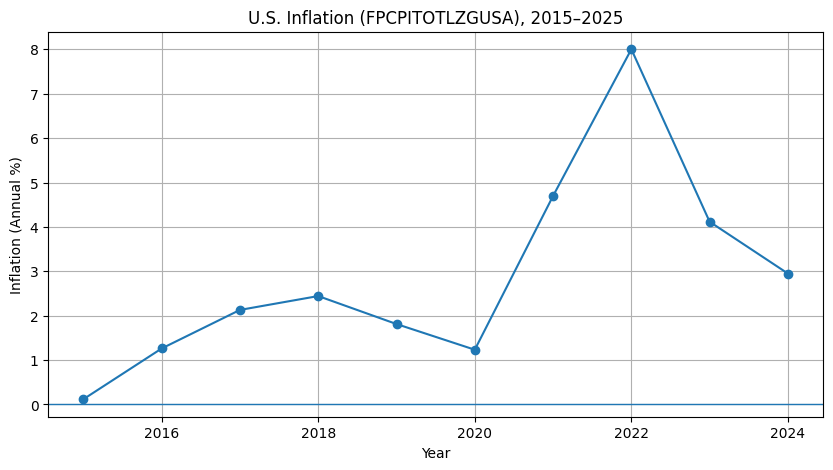

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(cpi_2015_2025["year"], cpi_2015_2025["inflation_rate"], marker="o")
plt.axhline(0, linewidth=1)
plt.xlabel("Year")
plt.ylabel("Inflation (Annual %)")
plt.title("U.S. Inflation (FPCPITOTLZGUSA), 2015–2025")
plt.grid(True)
plt.show()


In [75]:
cpi_2015_2025["year"] = cpi_2015_2025["date"].dt.year

yearly_inflation = (
    cpi_2015_2025.groupby("year")["inflation_rate"]
    .mean()
    .reset_index()
)
yearly_inflation


,year,inflation_rate
0,2015,0.118627
1,2016,1.261583
2,2017,2.130110
3,2018,2.442583
4,2019,1.812210
5,2020,1.233584
6,2021,4.697859
7,2022,8.002800
8,2023,4.116338
9,2024,2.949525


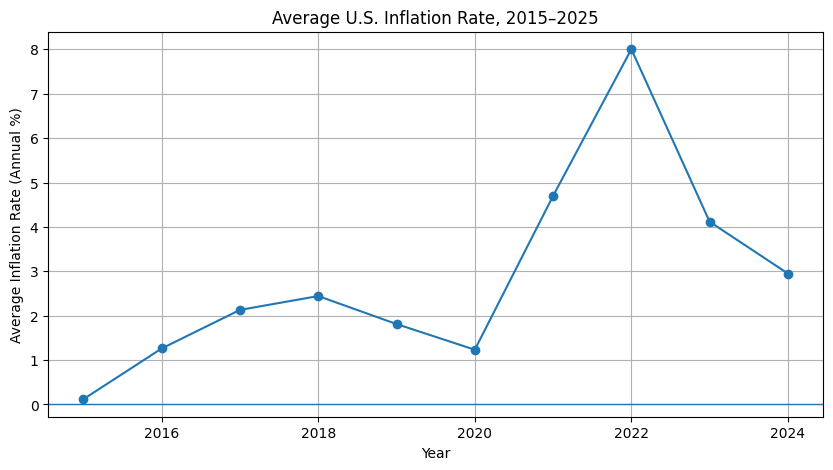

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_inflation["year"], yearly_inflation["inflation_rate"], marker="o")
plt.axhline(0, linewidth=1)
plt.xlabel("Year")
plt.ylabel("Average Inflation Rate (Annual %)")
plt.title("Average U.S. Inflation Rate, 2015–2025")
plt.grid(True)
plt.show()


In [77]:
cpi[["observation_date","FPCPITOTLZGUSA"]].head()

,observation_date,FPCPITOTLZGUSA
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912
